In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("cache/simulation_results.csv")
df

,n_sites,deployment_days_per_site,replicate,method,split,covs_rmse,psi_rmse,z_acc,time
0,50,28,0,spOcc,train,0.255849,0.474605,0.575000,1.350106
1,50,28,0,spOcc,test,0.255849,0.494786,0.600000,1.350106
2,50,28,0,Unmarked,train,0.244076,0.474529,0.575000,0.453774
3,50,28,0,Unmarked,test,0.244076,0.494426,0.600000,0.453774
4,50,28,0,NumPyro,train,0.240277,0.474664,0.550000,17.937065
...,...,...,...,...,...,...,...,...,...
1195,10000,365,9,spOcc,test,0.054687,0.402677,0.758000,137.107983
1196,10000,365,9,Unmarked,train,0.108152,0.399837,0.764375,13.283429
1197,10000,365,9,Unmarked,test,0.108152,0.403000,0.757000,13.283429
1198,10000,365,9,NumPyro,train,0.053741,0.399642,0.766375,31.167161


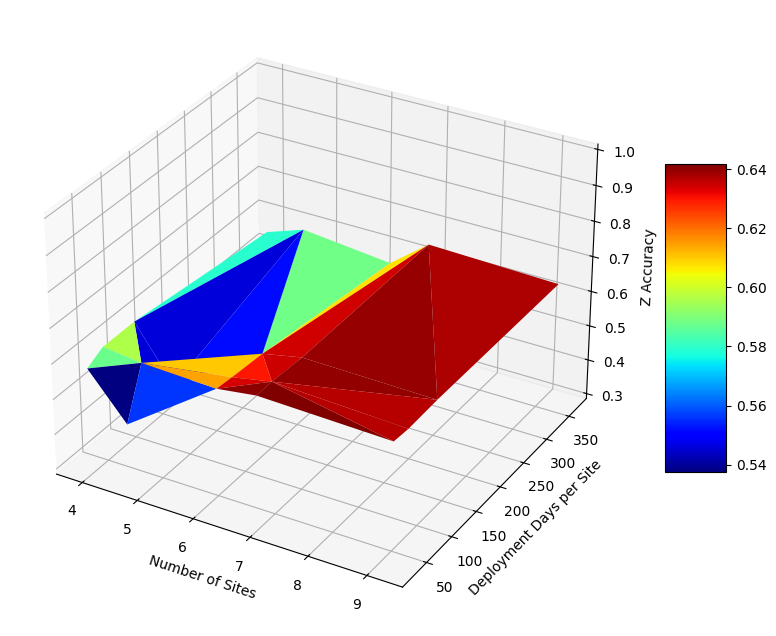

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_trisurf(np.log(df.n_sites), 
                      df.deployment_days_per_site, 
                      df.z_acc,
                      cmap=cm.jet,
                      linewidth=0.1)

# Add labels
ax.set_xlabel('Number of Sites')
ax.set_ylabel('Deployment Days per Site')
ax.set_zlabel('Z Accuracy')

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

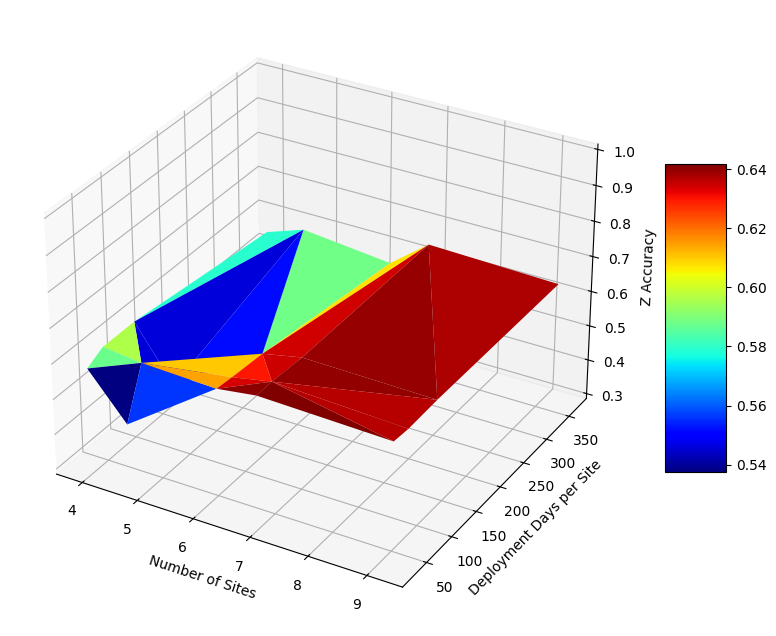

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

df.n_sites_log10 = np.log10(df.n_sites)

# Create a surface plot
surf = ax.plot_trisurf(df.n_sites_log10, 
                      df.deployment_days_per_site, 
                      df.z_acc,
                      cmap=cm.jet,
                      linewidth=0.1)

# Add labels
ax.set_xlabel('Number of Sites')
ax.set_ylabel('Deployment Days per Site')
ax.set_zlabel('Z Accuracy')

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

import ipywidgets as widgets
from IPython.display import display, clear_output

# Create dropdown widgets for x, y, and z axes
x_dropdown = widgets.Dropdown(
    options=df.columns,
    value='n_sites_log10',
    description='X axis:'
)

y_dropdown = widgets.Dropdown(
    options=df.columns,
    value='deployment_days_per_site',
    description='Y axis:'
)

z_dropdown = widgets.Dropdown(
    options=df.columns,
    value='z_acc',
    description='Z axis:'
)

def update_plot(x, y, z):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create surface plot with selected columns
    surf = ax.plot_trisurf(df[x] if x != 'n_sites' else np.log(df[x]), 
                          df[y],
                          df[z],
                          cmap=cm.jet,
                          linewidth=0.1)
    
    # Add labels
    ax.set_xlabel(x + (' (log)' if x == 'n_sites' else ''))
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

# Create interactive widget
widgets.interactive(update_plot, 
                   x=x_dropdown,
                   y=y_dropdown,
                   z=z_dropdown)